In [2]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/src/')
import _config

sys.path.append('/home/unix/maxwshen/')
from mylib import util

notebook_nm = 'fig_h2_reduced_readlen'
results_dir = _config.RESULTS_PLACE + f'{notebook_nm}/'
util.ensure_dir_exists(results_dir)

import h2_combine as parent_script

In [25]:
modelexp_nm = 'modelexp_simple_rl_rs'

df = pd.read_csv(parent_script.out_dir + f'{modelexp_nm}.csv', index_col = 0)
df['R2 overall'] = df['Pearsonr (overall)']**2
df.loc[df['read_len'] == 1, 'read_len'] = 3

print(df.columns)
print(df.shape)

df.to_csv(results_dir + f'{modelexp_nm}.csv')

Index(['Int name', 'Random seed', 'Dataset', 'Pearsonr (overall)',
       'TimewiseR count', 'TimewiseR mean', 'TimewiseR std', 'TimewiseR min',
       'TimewiseR 25%', 'TimewiseR 50%', 'TimewiseR 75%', 'TimewiseR max',
       'pace_num', 'threshold', 'read_len', 'min_gt_frequency',
       'proposal_type', 'R2 overall'],
      dtype='object')
(617, 18)


## plot

Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/results/fig_h2_reduced_readlen/boxplot.pdf ...


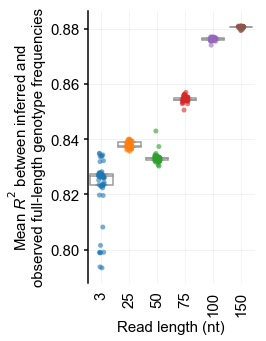

In [26]:
#
import matplotlib
matplotlib.rc('font', family = 'Arial', size = 15)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
#
fig, ax = plt.subplots(figsize = (3, 5))

# stat = 'Pearsonr (overall)'
# stat = 'TimewiseR mean'
stat = 'R2 overall'
dfs = df[df['read_len'] <= 150]

sns.boxplot(
    x = 'read_len',
    y = stat,
    data = dfs,
    color = 'white',
    fliersize = 0,
#     width = 0.6,
    whis = 0,
    ax = ax,
)
sns.stripplot(
    x = 'read_len',
    y = stat,
    data = dfs,
    alpha = 0.6,
    # color = '#b6b9bc',
#     palette = sns.color_palette('husl'),
    ax = ax,
)
plt.grid(alpha = 0.2)

plt.xlabel('Read length (nt)');
plt.ylabel('Mean $R^2$ between inferred and\nobserved full-length genotype frequencies');
plt.xticks(rotation = 90);

##

sns.despine(trim = False, bottom = True)
ax.xaxis.set_ticks_position('none') 
ax.tick_params(length = 4.5, color = 'black', width = 1.5)
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1.5)
    ax.spines[axis].set_color('black')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

out_fn = results_dir + f'boxplot.pdf'
print(f'Saving to {out_fn} ...')
plt.savefig(out_fn, transparent = True, bbox_inches = 'tight')

plt.show()
plt.close()
##

## explore

In [17]:
df.head()

,Int name,Random seed,Dataset,Pearsonr (overall),TimewiseR count,TimewiseR mean,TimewiseR std,TimewiseR min,TimewiseR 25%,TimewiseR 50%,TimewiseR 75%,TimewiseR max,pace_num,threshold,read_len,min_gt_frequency,proposal_type,R2 overall,TimewiseRsq 50%
0,0,0,simple_rl--pace_num-2--threshold-5--read_len-1...,0.909261,36.0,0.843201,0.188035,0.265652,0.820110,0.914694,0.965907,0.972079,2,5,1,0,smart,0.826756,0.836664
1,1,0,simple_rl--pace_num-2--threshold-5--read_len-2...,0.914967,36.0,0.852741,0.200473,0.254066,0.819171,0.949923,0.968757,0.972309,2,5,25,0,smart,0.837164,0.902353
2,2,0,simple_rl--pace_num-2--threshold-5--read_len-5...,0.913700,36.0,0.849415,0.202486,0.289819,0.817561,0.953840,0.969613,0.973239,2,5,50,0,smart,0.834848,0.909811
3,3,0,simple_rl--pace_num-2--threshold-5--read_len-7...,0.924206,36.0,0.868538,0.170333,0.377931,0.849448,0.950627,0.966890,0.969608,2,5,75,0,smart,0.854157,0.903692
4,4,0,simple_rl--pace_num-2--threshold-5--read_len-1...,0.935806,36.0,0.869332,0.185945,0.346271,0.833938,0.968415,0.976653,0.978471,2,5,100,0,smart,0.875733,0.937828


In [27]:
df[df['read_len'] == 3]['Dataset'].iloc[0]

'simple_rl--pace_num-2--threshold-5--read_len-1--min_gt_frequency-0--proposal_type-smart'

In [28]:
df[df['read_len'] == 3].sort_values(by = 'Pearsonr (overall)', ascending = False).iloc[0]['Dataset']

'simple_rl--pace_num-2--threshold-5--read_len-1--min_gt_frequency-0--proposal_type-smart'